# Project: Investigate a Dataset (Medical Appointment in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

### Questions 

The main goal of this analysis would be to investigate the No-show appointments dataset and see what trends that will be picked out. Main question: 
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

**Subquestions**:
1. What ratio of patients will show up on the day of appointment?
2. Does neighbourhood affect showing up during appointment?
3. Which gender will likely show up for appointment?

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
This include; Loading the data Assessing the data for cleanliness Data cleaning

In [2]:
# Load the data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

### Assessing the data

In [3]:
#checking the columns name
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
#checking the number of rows and columns

df.shape

(110527, 14)

In [5]:
#checking for duplicated data
sum(df.duplicated())

0

In [6]:
#checking for null values
df.isnull().sum().any()

False

In [7]:
#checking for the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
#checking for the number of unique value in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
#checking the different unique value in Handicap for it was meant to be 2 and not 5
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
#checking the counts of unique value 2,3,4 to know in the columns
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [11]:
#summary of the basic statistics of the data
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

**Observations**

# Data cleaning

In [12]:
#basically, dropping columns for reasons indicated in the observations above
df.drop(['PatientId', 'AppointmentID', 'Handcap'], axis=1, inplace=True)
df.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  SMS_received No-show  
0            0             1         0           0             0      No  
1            0             0         0           0             0      No  
2            0             0         0           0             0      No  
3            0             0         0           0             0      No  
4            0             1         1           0             0      No

In [13]:
#confirm drop changes

df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received',
       'No-show'],
      dtype='object')

In [14]:
# renaming column names
df = df.rename(columns={'Scholarship': 'BolsaFamília',
                        'Hipertension': 'Hypertension',
                        'SMS_received': 'SMS',
                        'No-show': 'Appointment'})

#confirm changes
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'BolsaFamília', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS',
       'Appointment'],
      dtype='object')

In [15]:
#The lambda function will be used to avoid recurrence
#convert all column names to lower case for uniformity
df.rename(columns = lambda x : x.lower(), inplace=True)
df.head(0)

Empty DataFrame
Columns: [gender, scheduledday, appointmentday, age, neighbourhood, bolsafamília, hypertension, diabetes, alcoholism, sms, appointment]
Index: []

In [16]:
#change the 0 and 1 in the disease columns
df['hypertension'] = df['hypertension'].replace([0,1],['Not-HTN', 'HTN'])
df['diabetes'] = df['diabetes'].replace([0,1], ['Not-DM', 'DM'])

In [17]:
#confirm changes
df.head()

gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   bolsafamília hypertension diabetes  alcoholism  sms appointment  
0             0          HTN   Not-DM           0    0          No  
1             0      Not-HTN   Not-DM           0    0          No  
2             0      Not-HTN   Not-DM           0    0          No  
3             0      Not-HTN   Not-DM           0    0          No  
4             0          HTN       DM           0    0          No

In [18]:
# change other 0 and 1
df['bolsafamília'] = df['bolsafamília'].replace([0,1],['Not_Enrolled', 'Enrolled'])
df['sms'] = df['sms'].replace([0,1],['Not_Received', 'Received'])

In [19]:
#confirm changes
df.head()

gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   bolsafamília hypertension diabetes  alcoholism           sms appointment  
0  Not_Enrolled          HTN   Not-DM           0  Not_Received          No  
1  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received          No  
2  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received          No  
3  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received          No  
4  Not_Enrolled          HTN       DM           0  Not_Received          No

In [20]:
#change the 'No' and 'Yes' to 'Show' and 'Missed' in the Appointment column
df['appointment'] = df['appointment'].replace(['No', 'Yes'],['Show', 'Missed'])

In [21]:
#confirm changes
df['appointment'].unique()

array(['Show', 'Missed'], dtype=object)

In [22]:
#Datetime Formatting
df[['scheduledday','appointmentday']] = df[['scheduledday','appointmentday']].astype('datetime64[ns]')

In [23]:
#confirm changes
df[['scheduledday','appointmentday']].dtypes

scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
dtype: object

In [24]:
#make use of query to see the row that has the age as -1
df.query('age == -1')

gender        scheduledday appointmentday  age neighbourhood  \
99832      F 2016-06-06 08:58:13     2016-06-06   -1         ROMÃO   

       bolsafamília hypertension diabetes  alcoholism           sms  \
99832  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   

      appointment  
99832        Show

In [25]:
#drop function and set axis to 0 to remove the row with the wrong value
df.drop(99832, axis=0, inplace=True)

In [26]:
df.describe()

age     alcoholism
count  110526.000000  110526.000000
mean       37.089219       0.030400
std        23.110026       0.171686
min         0.000000       0.000000
25%        18.000000       0.000000
50%        37.000000       0.000000
75%        55.000000       0.000000
max       115.000000       1.000000

In [27]:
# make use of the query function to see all rows with the value of 0 as the age
df.query('age == 0')

gender        scheduledday appointmentday  age      neighbourhood  \
59          F 2016-04-29 08:08:43     2016-04-29    0          CONQUISTA   
63          M 2016-04-27 10:46:12     2016-04-29    0       SÃO BENEDITO   
64          M 2016-04-25 13:28:21     2016-04-29    0  ILHA DAS CAIEIRAS   
65          M 2016-04-27 10:48:50     2016-04-29    0          CONQUISTA   
67          F 2016-04-29 08:53:02     2016-04-29    0     NOVA PALESTINA   
...       ...                 ...            ...  ...                ...   
110345      F 2016-05-16 12:30:58     2016-06-01    0        RESISTÊNCIA   
110346      M 2016-06-06 14:22:34     2016-06-08    0        RESISTÊNCIA   
110454      F 2016-06-03 15:18:44     2016-06-03    0        RESISTÊNCIA   
110460      F 2016-06-03 08:56:51     2016-06-03    0        RESISTÊNCIA   
110507      F 2016-06-08 09:04:18     2016-06-08    0        MARIA ORTIZ   

        bolsafamília hypertension diabetes  alcoholism           sms  \
59      Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
63      Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
64      Not_Enrolled      Not-HTN   Not-DM           0      Received   
65      Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
67      Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
...              ...          ...      ...         ...           ...   
110345  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
110346  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
110454  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
110460  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   
110507  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received   

       appointment  
59            Show  
63            Show  
64            Show  
65            Show  
67            Show  
...            ...  
110345        Show  
110346        Show  
110454        Show  
110460        Show  
110507        Show  

[3539 rows x 11 columns]

In [28]:
# Checking the table 
df.head()

gender        scheduledday appointmentday  age      neighbourhood  \
0      F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1      M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2      F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3      F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4      F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   

   bolsafamília hypertension diabetes  alcoholism           sms appointment  
0  Not_Enrolled          HTN   Not-DM           0  Not_Received        Show  
1  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received        Show  
2  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received        Show  
3  Not_Enrolled      Not-HTN   Not-DM           0  Not_Received        Show  
4  Not_Enrolled          HTN       DM           0  Not_Received        Show

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Ratio of patients that shows up for appointment)

In [29]:
# ratio of patients that showed up for appointment
ratio_count = df['appointment'].value_counts()/df['appointment'].count()*100
ratio_count.round(1)

Show      79.8
Missed    20.2
Name: appointment, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


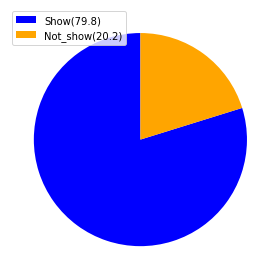

In [30]:
#chart labels
figsize = (8,8)
labels = [r'Show(79.8)', r'Not_show(20.2)']
sizes = [79.8, 20.2]
colors =['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend()
plt.legend(patches, labels, loc="upper left")

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('on')
plt.tight_layout()
plt.show()

Observation: About 80% of the patients showed up for the appointment.

### Research Question 2  (Does neighbourhood affect showing up during appointment?)

In [31]:
# ratio of patients that showed up in the neighbourhood for their appointments
ratio_neighbourhood = df['neighbourhood'].value_counts()/df['neighbourhood'].count()*100
ratio_neighbourhood.round(2)

JARDIM CAMBURI                 6.98
MARIA ORTIZ                    5.25
RESISTÊNCIA                    4.01
JARDIM DA PENHA                3.51
ITARARÉ                        3.18
                               ... 
ILHA DO BOI                    0.03
ILHA DO FRADE                  0.01
AEROPORTO                      0.01
ILHAS OCEÂNICAS DE TRINDADE    0.00
PARQUE INDUSTRIAL              0.00
Name: neighbourhood, Length: 81, dtype: float64

In [32]:
# ratio of all patients that showed up for their appointment in the neighbourhood
ratio_neighbourhood_showed = df.groupby(['neighbourhood', 'appointment'])['age'].count()/df.groupby(['neighbourhood'])['age'].count()*100
ratio_neighbourhood_showed .unstack().round(1)

appointment          Missed  Show
neighbourhood                    
AEROPORTO              12.5  87.5
ANDORINHAS             23.0  77.0
ANTÔNIO HONÓRIO        18.5  81.5
ARIOVALDO FAVALESSA    22.0  78.0
BARRO VERMELHO         21.5  78.5
...                     ...   ...
SÃO JOSÉ               21.6  78.4
SÃO PEDRO              21.0  79.0
TABUAZEIRO             18.3  81.7
UNIVERSITÁRIO          21.1  78.9
VILA RUBIM             16.6  83.4

[81 rows x 2 columns]

In [33]:
#make a function to plot bar chart in other to avoid recurrence
def bar(data, xaxis, yaxis, titles, labels):
    data.plot(kind = 'bar', figsize =(14,8))
    plt.xlabel(xaxis, fontsize = 20)
    plt.ylabel(yaxis, fontsize = 20)
    plt.title(titles, fontsize = 20)
    labels = labels
    plt.show()

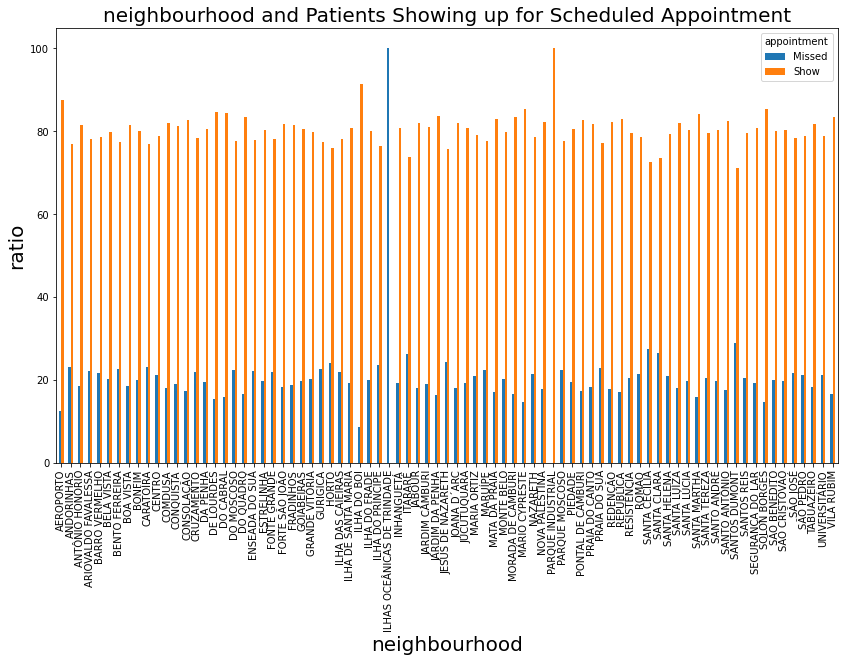

In [34]:
# Double bar to show ratio of patients that showed and missed neighbourhood appointment and how they responded to their medical appointments
labels = ['Missed', 'Showed']
bar(ratio_neighbourhood_showed.unstack(), 'neighbourhood', 'ratio', 'neighbourhood and Patients Showing up for Scheduled Appointment', labels)

#### Research Question 3  (Which gender will likely 3w up for appointment?)

In [35]:
#Find the number of patients by gender
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

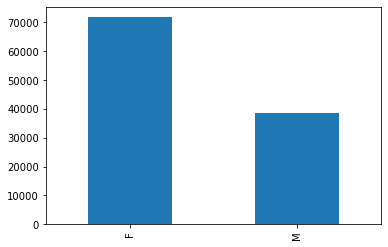

In [36]:
#plot a simple bar chart showing the ratio of male to female
df.gender.value_counts().plot(kind='bar');

In [37]:
# calculate the ratio of patients who showed and missed based on gender
gender_ratio = df.groupby(['gender', 'appointment'])['age'].count()/df.groupby(['gender'])['age'].count()*100
gender_ratio.round(2)

gender  appointment
F       Missed         20.31
        Show           79.69
M       Missed         19.97
        Show           80.03
Name: age, dtype: float64

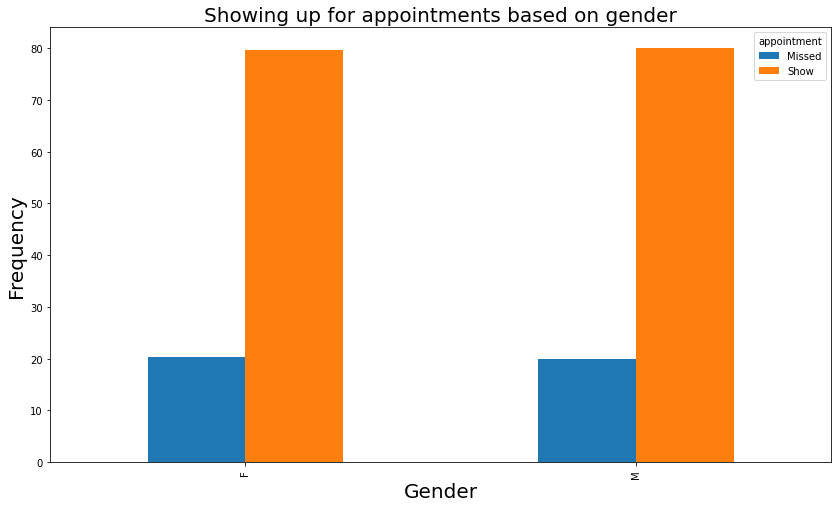

In [38]:
# Double bar chart showing patient those who showed and missed based on gender
# Using the bar function created to avoid recurrence
bar(gender_ratio.unstack(), 'Gender', 'Frequency', 'Showing up for appointments based on gender', labels)

<a id='conclusions'></a>
## Conclusions

#### Summary

#### Limitation: 
Most neighbourhood don't have enough data for the male gender, which makes having access to them to be difficult.

#### Recommendations

In [39]:
df.to_csv('df_final.csv')